In [1]:
from matplotlib import pyplot as plt

from filters import HighPassFilter
from utils import (
    load_sonar_data
)

# 예제 : 초음파 거리계

In [2]:
dt, ts, sonar = load_sonar_data()

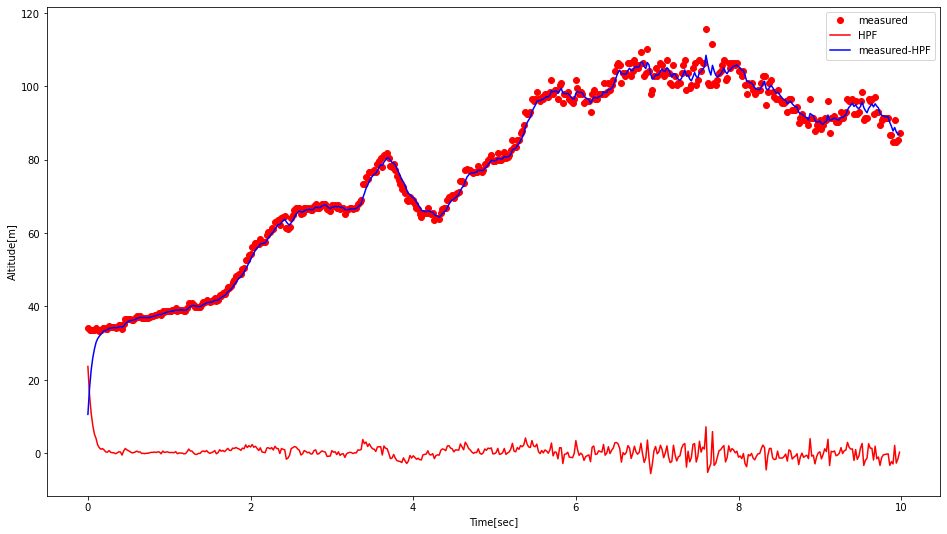

In [3]:
hfp = HighPassFilter(tau=0.0223, dt=dt)

measured = []
filtered = []

for z in sonar:
    hfp.update(z)
    x = hfp.get()
    
    measured.append(z)
    filtered.append(x)
    
plt.figure(figsize=[16, 9])
plt.plot(ts, measured, 'ro', label='measured')
plt.plot(ts, filtered, 'r-', label='HPF')
plt.plot(ts, [m-f for m, f in zip(measured, filtered)], 'b-', label='measured-HPF')
plt.legend()
plt.xlabel('Time[sec]')
plt.ylabel('Altitude[m]')
plt.show()
